In [2]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### **Data Exploration**

In [ ]:
# Load the dataset
wriple_df = pd.read_csv('../dataset/preprocessed/wrip_v2.csv')
wriple_df.info()
wriple_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36265 entries, 0 to 36264
Columns: 323 entries, Presence to Amp_S306
dtypes: float64(308), int64(15)
memory usage: 89.4 MB


,Presence,Target_Count,Angle,Distance,RSSI,Target1_X,Target1_Y,Target1_Speed,Target1_Resolution,Target2_X,...,Amp_S297,Amp_S298,Amp_S299,Amp_S300,Amp_S301,Amp_S302,Amp_S303,Amp_S304,Amp_S305,Amp_S306
0,1,1,1.0,-1.0,-84,-146,5572,-8,360,0,...,25.059928,24.020824,24.839485,27.018512,27.018512,28.231188,26.000000,23.409400,25.079872,0.0
1,1,1,1.0,-1.0,-83,-144,5631,0,360,3333,...,30.016662,24.839485,25.317978,29.732137,32.015621,24.758837,30.149627,30.479501,25.019992,0.0
2,1,1,1.0,-1.0,-83,-144,5631,0,360,3333,...,24.515301,21.633308,21.377558,22.803509,24.515301,20.808652,25.179357,24.207437,20.615528,0.0
3,1,1,1.0,-1.0,-82,-144,5631,0,360,3333,...,23.430749,19.235384,18.601075,17.720045,21.095023,17.262677,17.888544,23.323808,19.723083,0.0
4,1,1,1.0,-1.0,-87,-144,5631,0,360,3333,...,14.035669,13.453624,16.031220,18.867962,17.720045,19.697716,20.124612,17.464249,14.142136,0.0


In [184]:
# Display the statistics of the dataset
wriple_df.describe()

,Presence,Target_Count,Angle,Distance,RSSI,Target1_X,Target1_Y,Target1_Speed,Target1_Resolution,Target2_X,...,Amp_S297,Amp_S298,Amp_S299,Amp_S300,Amp_S301,Amp_S302,Amp_S303,Amp_S304,Amp_S305,Amp_S306
count,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,...,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000,10661.000000
mean,0.501641,0.409718,0.638871,-0.270519,-79.410374,-13.577150,2326.503611,0.157584,264.031517,-91.713723,...,21.861521,20.893411,22.100913,21.701005,23.658583,22.398103,25.616802,24.857549,34.663152,34.945399
std,0.500021,0.491805,11.204460,1.606560,5.311106,915.613592,2175.914622,7.370771,159.188822,580.899807,...,6.832400,5.433948,6.711467,5.432006,7.531289,5.010491,8.450496,3.688505,11.498319,9.961084
min,0.000000,0.000000,-45.000000,-1.000000,-94.000000,-2600.000000,0.000000,-39.000000,0.000000,-2865.000000,...,4.569149,6.540173,5.064313,6.433784,4.113433,9.030751,3.915033,15.743950,5.923138,10.861284
25%,0.000000,0.000000,-1.000000,-1.000000,-80.000000,-422.000000,0.000000,0.000000,0.000000,0.000000,...,15.961399,16.332404,16.275178,17.438377,17.265410,18.220710,18.196369,22.041402,24.690282,27.412057
50%,1.000000,0.000000,1.000000,-1.000000,-78.000000,0.000000,1740.000000,0.000000,360.000000,0.000000,...,23.555471,21.511672,23.616292,22.225623,25.392810,22.754201,27.776491,24.309558,37.460943,31.782736
75%,1.000000,1.000000,1.000000,-1.000000,-76.000000,573.000000,4628.000000,0.000000,360.000000,0.000000,...,26.443778,24.515558,26.620479,25.160304,28.672412,25.479787,31.395411,26.560499,42.411390,43.788075
max,1.000000,1.000000,45.000000,5.000000,-73.000000,2656.000000,5876.000000,48.000000,360.000000,3333.000000,...,42.150245,39.631813,42.963290,41.802774,45.692710,44.015795,52.280048,46.816518,69.044689,65.692996


In [18]:
# Count the samples for each class in the target variable and calculate percentages
value_counts = wriple_df['Presence'].value_counts()
percentages = wriple_df['Presence'].value_counts(normalize=True) * 100

value_counts_df = pd.DataFrame({
    'Count': value_counts,
    'Percentage': np.round(percentages, 2)
})
value_counts_df

,Count,Percentage
Presence,,
1,19354,53.37
0,16911,46.63


### **Data Preprocessing**

In [52]:
# Drop unnecessary columns
wriple_df.drop(columns=['Target_Count', 'Distance', 'Angle', 'RSSI',
           'Target1_X', 'Target1_Y', 'Target1_Speed', 'Target1_Resolution', 
           'Target2_X', 'Target2_Y', 'Target2_Speed', 'Target2_Resolution', 
           'Target3_X', 'Target3_Y', 'Target3_Speed', 'Target3_Resolution'], inplace=True)
wriple_df.shape

(36265, 307)

In [53]:
# Standardize the numerical features except the target variable since it is binary
columns = wriple_df.drop(columns='Presence').columns

std_scaler = StandardScaler()
wriple_df[columns] = std_scaler.fit_transform(wriple_df[columns])
wriple_df.head()

,Presence,Amp_S1,Amp_S2,Amp_S3,Amp_S4,Amp_S5,Amp_S6,Amp_S7,Amp_S8,Amp_S9,...,Amp_S297,Amp_S298,Amp_S299,Amp_S300,Amp_S301,Amp_S302,Amp_S303,Amp_S304,Amp_S305,Amp_S306
0,1,-2.842171e-14,0.0,0.0,0.0,0.0,0.0,1.060763,1.251760,1.164966,...,0.897694,0.789560,0.888766,1.130587,1.045310,1.258372,0.816045,0.360573,0.658512,0.0
1,1,-2.842171e-14,0.0,0.0,0.0,0.0,0.0,1.065859,1.052017,0.895925,...,1.684396,0.924540,0.966995,1.558318,1.811109,0.724454,1.446272,1.455655,0.649051,0.0
2,1,-2.842171e-14,0.0,0.0,0.0,0.0,0.0,0.887619,0.883908,0.708322,...,0.811254,0.395910,0.322772,0.466203,0.661697,0.117063,0.691410,0.484180,-0.046854,0.0
3,1,-2.842171e-14,0.0,0.0,0.0,0.0,0.0,-0.790915,-0.532668,-0.769501,...,0.639121,0.000544,-0.131157,-0.335070,0.137545,-0.428176,-0.415885,0.347316,-0.187860,0.0
4,1,-2.842171e-14,0.0,0.0,0.0,0.0,0.0,0.597864,0.742766,0.386019,...,-0.852007,-0.952744,-0.551305,-0.154132,-0.379665,-0.053758,-0.076281,-0.560266,-1.069650,0.0


In [54]:
X = wriple_df.drop(columns='Presence').values.tolist()
y = wriple_df['Presence'].tolist()

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

train_test_shape = pd.DataFrame({
    'Training' : (len(X_train), len(y_train)),
    'Testing' : (len(X_test), len(y_test)),
    'Total' : (len(X), len(y)),
    'Features' : (X_pca.shape[1], X_pca.shape[1])
})
train_test_shape

,Training,Testing,Total,Features
0,29012,7253,36265,20
1,29012,7253,36265,20


In [55]:
# Initialize the base classifiers for the ensemble models
base_lr = LogisticRegression(random_state=42, n_jobs=-1)

# Train a Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42, n_jobs=-1)
log_reg.fit(X_train, y_train)

# Train a Decision Tree Classifier
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)

# Train a K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)

# Train a Bagging Classifier
bagging = BaggingClassifier(estimator=base_lr, random_state=42, n_jobs=-1)
bagging.fit(X_train, y_train)

# Train an Extra Trees Classifier
extra_trees = ExtraTreesClassifier(random_state=42, n_jobs=-1)
extra_trees.fit(X_train, y_train)

# Train an AdaBoost Classifier
adaboost = AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, random_state=42)

In [56]:
# Display the evaluation results for each model
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dec_tree,
    'K-Nearest Neighbors': knn,
    'Bagging (LogReg)': bagging,
    'Extra Trees': extra_trees,
    'AdaBoost': adaboost,
}
eval_results = []

for name, model in models.items():
    start_time = time.time()
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    inference_time = time.time() - start_time
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    cv_scores = cross_val_score(model, X_pca, y, cv=5, n_jobs=-1)
    
    eval_results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Cross-Val Score': cv_scores.mean(),
        'Inference Time (s)': inference_time
    })

eval_results_df = pd.DataFrame(eval_results)
eval_results_df

,Model,Train Accuracy,Test Accuracy,Cross-Val Score,Inference Time (s)
0,Logistic Regression,0.804357,0.798704,0.741238,0.002969
1,Decision Tree,1.000000,0.958914,0.769695,0.015702
2,K-Nearest Neighbors,0.990866,0.986626,0.782986,3.513986
3,Bagging (LogReg),0.804184,0.798842,0.739611,0.338931
4,Extra Trees,1.000000,0.991314,0.805322,0.299177
5,AdaBoost,0.855680,0.842686,0.734014,0.261587


In [57]:
# Display the confusion matrix for the each model
matrix_results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    tn, fp, fn, tp = cm.ravel()
    
    matrix_results.append({
        'Model': name,
        'True Positives': tp,
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn
    })

matrix_results_df = pd.DataFrame(matrix_results)
matrix_results_df

,Model,True Positives,True Negatives,False Positives,False Negatives
0,Logistic Regression,3154,2639,759,701
1,Decision Tree,3710,3245,153,145
2,K-Nearest Neighbors,3786,3370,28,69
3,Bagging (LogReg),3158,2636,762,697
4,Extra Trees,3821,3369,29,34
5,AdaBoost,3322,2790,608,533


In [58]:
# Evaluate the classification report of original dataset
y_pred = log_reg.predict(X_test)
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df

,precision,recall,f1-score,support
0,0.790120,0.776633,0.783318,3398.000000
1,0.806031,0.818158,0.812049,3855.000000
accuracy,0.798704,0.798704,0.798704,0.798704
macro avg,0.798075,0.797396,0.797684,7253.000000
weighted avg,0.798577,0.798704,0.798589,7253.000000


In [59]:
# Get predicted probabilities
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
gmeans = np.sqrt(tpr * (1 - fpr))

# Identify the best threshold by maximizing G-mean
best_idx = np.argmax(gmeans)
best_thresh = thresholds[best_idx]
print(f'Best Threshold: {best_thresh:.4f}')
print(f'Best G-Mean: {gmeans[best_idx]:.4f}')

Best Threshold: 0.5900
Best G-Mean: 0.8058


### **Model Visualization**

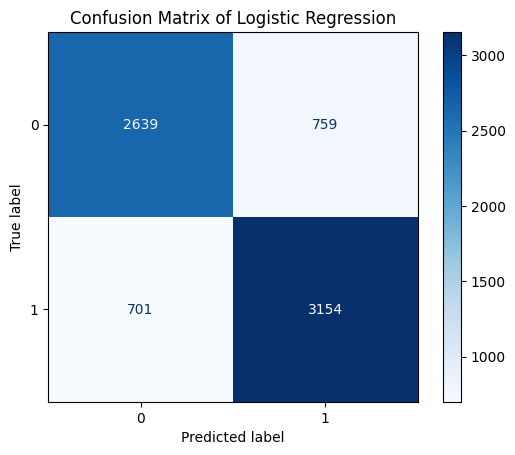

In [60]:
# Visualize the confusion matrix
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

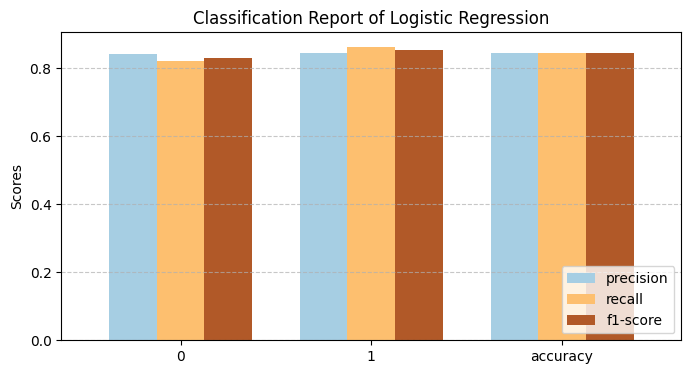

In [61]:
# Visualize the Classification Report
y_pred = log_reg.predict(X_test)
class_report = classification_report(y_test, y_test_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

# Filter to include only precision, recall, and f1-score
metrics_to_plot = ['precision', 'recall', 'f1-score']
class_report_df_filtered = class_report_df[metrics_to_plot]
bar_width = 0.75

class_report_df_filtered[:-2].plot(kind='bar', figsize=(8, 4), colormap='Paired', width=bar_width)
plt.title('Classification Report of Logistic Regression')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

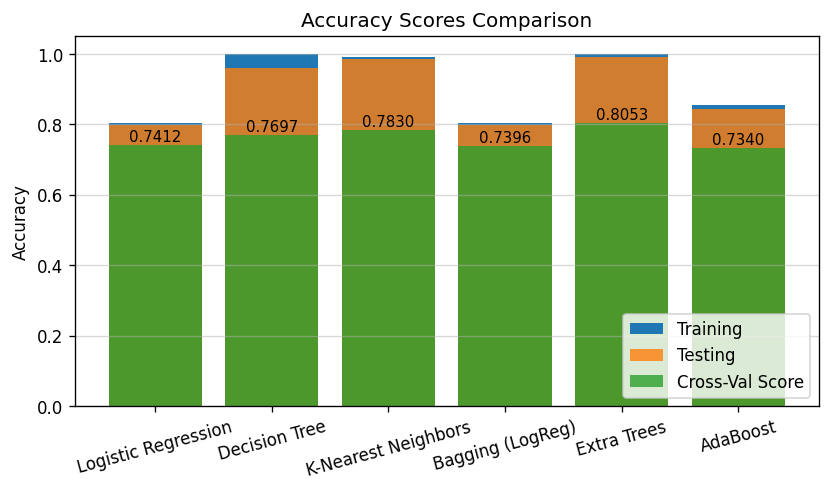

In [62]:
# Visualize the training and testing accuracies of the models
plt.figure(figsize=(8, 4), dpi=120)
plt.bar(eval_results_df['Model'], eval_results_df['Train Accuracy'], label='Training')
plt.bar(eval_results_df['Model'], eval_results_df['Test Accuracy'], alpha=0.8, label='Testing')
plt.bar(eval_results_df['Model'], eval_results_df['Cross-Val Score'], alpha=0.8, label='Cross-Val Score')

# Add text annotations for Cross-Val Score
for index, value in enumerate(eval_results_df['Cross-Val Score']):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center', fontsize=9)

plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.ylabel('Accuracy')
plt.title('Accuracy Scores Comparison')
plt.legend(loc='lower right')
plt.show()

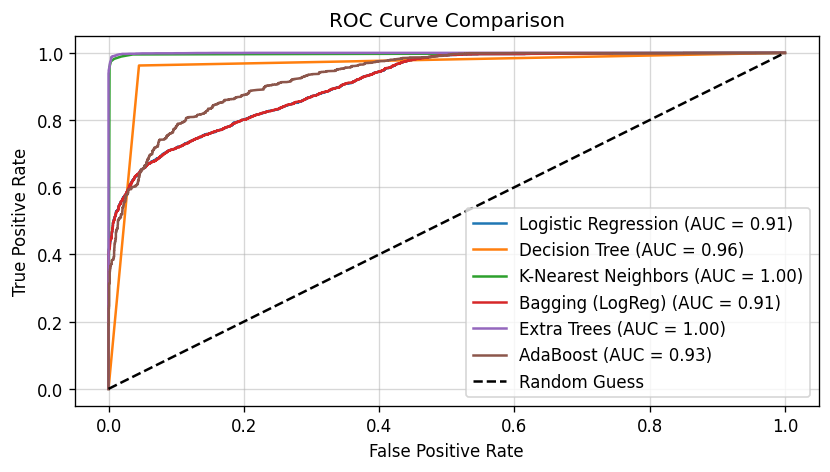

In [63]:
# Visualize the ROC curve and AUC for each model
plt.figure(figsize=(8, 4),dpi=120)

for name, model in models.items():
    if hasattr(model, 'predict_proba'):  # Check if the model supports predict_proba
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:  # Use decision_function for models like SVC
        y_pred_proba = model.decision_function(X_test)
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())  # Normalize

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

Computing permutation importance for Logistic Regression
Computing permutation importance for Bagging (LogReg)
Computing permutation importance for Decision Tree
Computing permutation importance for AdaBoost
Computing permutation importance for K-Nearest Neighbors
Computing permutation importance for Extra Trees


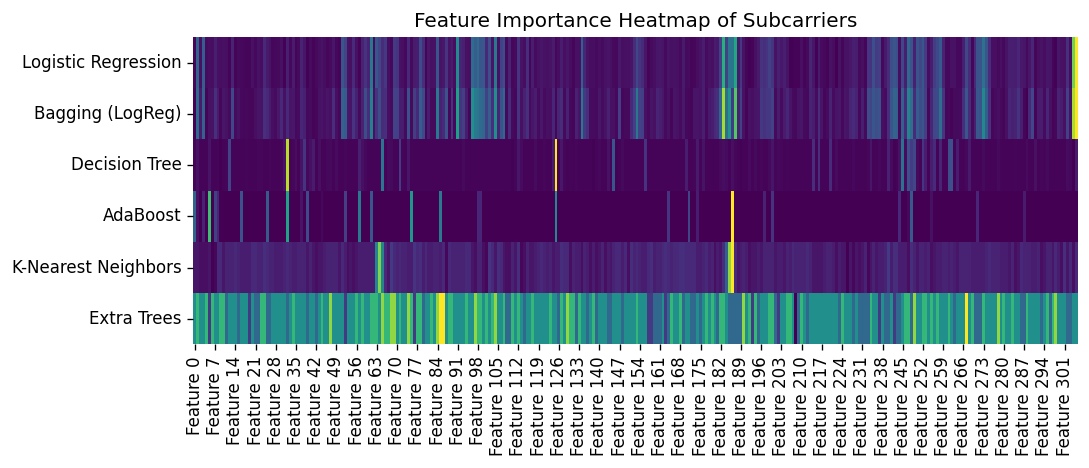

In [293]:
models = {
    'Logistic Regression': log_reg,
    'Bagging (LogReg)': bagging,
    'Decision Tree': dec_tree,
    'AdaBoost': adaboost,
    'K-Nearest Neighbors': knn,
    'Extra Trees': extra_trees
}

# Get feature names
try:
    feature_names = X_test.columns
except AttributeError:
    feature_names = [f"Feature {i}" for i in range(306)]

# Store raw feature importances
all_importances = []
model_names = []

for name, model in models.items():
    print(f"Computing permutation importance for {name}")
    result = permutation_importance(model, X_test, y_test, n_repeats=1, random_state=42, n_jobs=-1)
    all_importances.append(result.importances_mean)
    model_names.append(name)

# Stack to form raw importance matrix
importance_matrix = np.vstack(all_importances)
importance_df = pd.DataFrame(importance_matrix, columns=feature_names, index=model_names)

# Normalize per model (row-wise min-max scaling)
normalized_df = importance_df.copy()
normalized_df = (normalized_df - normalized_df.min(axis=1).values[:, None]) / \
                (normalized_df.max(axis=1).values[:, None] - normalized_df.min(axis=1).values[:, None] + 1e-9)

# Plot heatmap
plt.figure(figsize=(len(feature_names) * 0.03, len(models) * 0.5 + 1), dpi=120)
sns.heatmap(normalized_df, cmap='viridis', cbar=False)
plt.title('Feature Importance Heatmap of Subcarriers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [342]:
scaler_df = wriple_df.drop(columns='Presence').values.tolist()
std_scaler = StandardScaler()
scaler_df = std_scaler.fit_transform(scaler_df)

# Save the model
joblib.dump(std_scaler, '../model/wriple_v2_STD.pkl') # TODO: Fit the scaler without feature names
joblib.dump(pca, '../model/wriple_v2_PCA.pkl')
joblib.dump(log_reg, '../model/wriple_v2_LR.pkl')
joblib.dump(adaboost, '../model/wriple_v2_AB.pkl')
joblib.dump(extra_trees, '../model/wriple_v2_ET.pkl')

['../model/wriple_v2_ET.pkl']